In [1]:
# Checking tensorflow version
import tensorflow as tf 
tf.__version__

'2.19.0'

In [2]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits between 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Unpacks the data 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


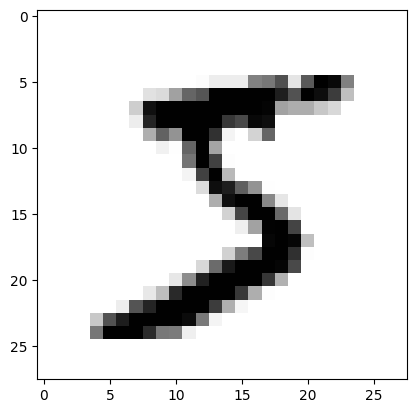

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary) # cmap = plt.cm.binary is a grayscale color map
plt.show()
# print(x_train[0]) # this shows the pixel values of the image

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

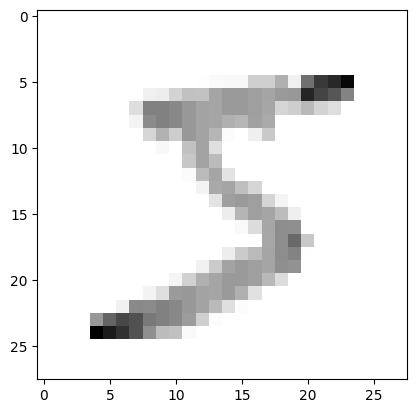

In [5]:
# From above, we can see that the image has a 0 - 255 pixel scale. To minimise this scale (between 0 and 1), we can provide 
# it with a range using the normalize function.

x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalizes the data
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalizes the data
plt.imshow(x_train[0], cmap=plt.cm.binary) # We can see by scaling down our pixel range, some areas of the image are lighter, making it easier for the model to learn
print(x_train[0])

## Building the CNN Model

In [8]:
# Model base/creation
model = tf.keras.models.Sequential() # Sequential model is a linear stack of layers - it is the most common one
model.add(tf.keras.layers.Flatten()) # Flattening the 28x28 images into a single array of 784 pixels

# Creating layers for the model
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # This is what will make a neuron fire. 'relu' = rectified linear. relu is the default activation method 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output function, with the number of neurons equal to the number of classes (0-9). Softmax is used for multi-class classification problems. 
                                                                # It converts the output to a probability distribution for us to determine whether (here) if it is a cat or dog

# Defining paramters for training the model 
model.compile(optimizer = 'adam', # Adam is an adaptive learning rate optimization algorithm. It is a popular choice for training deep learning models
              loss = 'sparse_categorical_crossentropy' , # Categorical crossentropy is used for multi-class classification problems. It measures the dissimilarity between the true and predicted probability distributions
              metrics = ['accuracy']) # The optimizer is the algorithm used to update the weights of the model. The loss function is used to measure how well the model is performing

### Making a cat and dog CNN

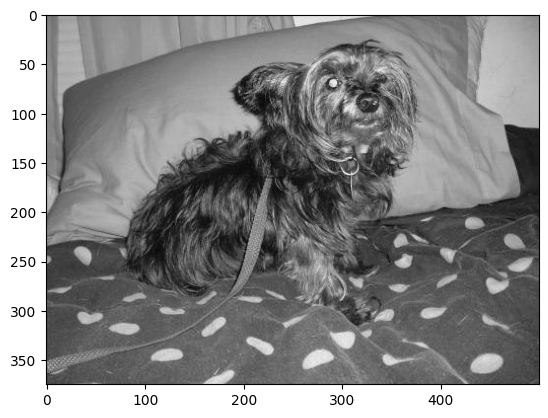

In [16]:
import os
import cv2

directory = r"C:\Users\Ivan\Documents\Python Scripts\catdog_cnn\pets"
categories = ["Dog", "Cat"]

for categories in categories:
    path = os.path.join(directory, categories) # Creates a path to the directory
    for img in os.listdir(path): # Loops through the images in the directory
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Reads the image in greyscale
        plt.imshow(img_array, cmap="gray") # Displays image
        plt.show() # Shows image
        break # Breaks the loop after displaying one image
    break # Breaks the loop after displaying one image

In [18]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [19]:
print(img_array.shape) # Prints the shape of the image array

(375, 500)


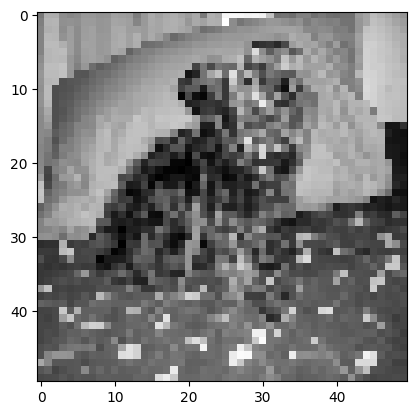

In [39]:
# Making all the images the same size for simplicity
img_size = 50 # Size of the image
new_array = cv2.resize(img_array, (img_size, img_size)) # Resizes the image to 50x50 pixels
plt.imshow(new_array, cmap="gray") 

In [37]:
def create_training_data():
    for category in categories:  # Use 'category' instead of 'categories'
        path = os.path.join(directory, category)
        class_num = categories.index(category) # Gets the index of the category
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass        
            # The training data is a list of lists, where each list contains the image array and the class number
        
create_training_data() 

In [38]:
print(len(training_data)) # Prints the length of the training data

25240


In [42]:
# We should randomise the data to avoid bias and help the machine learn better
import random
random.shuffle(training_data) 

In [43]:
for sample in training_data[:10]: # Prints the first 10 samples of the training data
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [51]:
X = [] # X is usually the feature set
Y = [] # Y is usually the label set

In [54]:
import numpy as np
for features, label in training_data: # Loops through the training data
    X.append(features) # Appends the features to the X list
    Y.append(label) # Appends the label to the Y list

# Make X a numpy array
# X = np.array(X).reshape(-1, img_size, img_size, 1) # Reshapes the array to be 50x50 pixels with 1 color channel (grayscale)



In [57]:
import pickle
pickle_out = open(r"C:\Users\Ivan\Documents\Python Scripts\catdog_cnn\models\X.pickle", "wb") # Opens a file to write the data
pickle.dump(X, pickle_out) # Dumps the data into the file
pickle_out.close() # Closes the file

In [58]:
# pickle_open = open(r"C:\Users\Ivan\Documents\Python Scripts\catdog_cnn\models\X.pickle", "rb") # Opens a file to read the data
# X = pickle.load(pickle_open) # Loads the data from the file